Exercises 1.
- null hypothesis is beta_n = 0 for n-numbers of coefficients, while alternative hypothesis is that beta_n ≠ 0.
- all coefficients with a p-value below 5% are statistically significant, which means there is a statistically significant relation betwen sales and TV and radio
- BUT: be careful if TV and radio are correlating. This might obscure real relations. There is a possibility that there's only a relation between TV or radio with sales.
- newspaper with a p-value > 5% shows that there is no relation between the sales and newspaper advertisment.

Exercise 2.
- KNN uses the closest neighbour to make prediction
- regression predicts quantitative values while classification predicts qualitative values.

Exercise 3
Given:
- X1 = GPA
- X2 =IQ
- X3 = Level (1 for College and 0 for High School)
- X4 = Interaction between GPA and IQ
- X5 = Interaction between GPA and Level

- a.i.)
    - for fixed GPA and IQ high school graduates earn on avg term0=50 + term1=20 = term3=0 + term4=0.07 + term5=0 = 70.07
    - for fixed GPA and IQ college graduates earn on avg term0=50 + term1=20 = term3=35 + term4=0.07 + term5=-10 = 95.07
    - FALSE
- a. ii.)
    - TRUE
- a. iii.) 
    - for fixed GPA and IQ  high school graduates on avg term0=50*x + term1=20 = term3=0 + term4=0.07*x + term5=0 = 20.07 + 50*x
    - for fixed GPA and IQ  college graduates on avg term0=50*x + term1=20 = term3=0 + term4=0.07*x + term5=-10*x = 20.07 + (50 - 10)*x
    -  20.07 + 50*x > 20.07 + (50 - 10)*x
    - 50*x > (50 - 10)*x
    - 50*x > 50x - 10x
    - 50*x > 40x
    - TRUE
- a. iv.)
    - opposite of iii.) so FALSE

- b) Let's calculate step by step:
    - term0 = 50 * 4.0 = 200
    - term1 = 20 * 110 = 2200
    - term3 = 35
    - term4 = 0.07 * (110 * 4.0) = 0.07 * 440 = 30.8
    - term5 = -10 * 4 * 1 = -40
    - Total = 200 + 2200 + 35 + 30.8 + (-40) = 2425.8

- c) 
    - FALSE
    - could be very small but still significant. P-values necessary.

Exercise 4
- a)
    - the RSS for the cubic regression is smaller than for the linear regression.
    - cubic regression has more coefficients to compensate the epsilon error term.
    - more coeffs -> more overfitting -> less RSS

- b)
    - for test data, linear regression has lower RSS than cubic regression
    - because cubic regression overfits to training, high variance.

- c) 
    - cubic regression will always have a lower training RSS over linear regression.
    - BUT: higher degree of overfitting.

- d) 
    - this depends how far away the relationship between X and Y are from linear.

In [1]:
# import packages
import statsmodels.api as sm
from ISLP import load_data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from statsmodels.stats.anova import anova_lm
from itertools import combinations

/Users/tungvuduc/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [12]:
# load the data
auto = load_data('Carseats')

# exercise 8

In [2]:
# exercise 8
# a)

auto = load_data('Auto')

# i)
# check for relationship between mpg and horsepower
y = auto["mpg"]
X = auto["horsepower"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()
# high r2 value -> strong relationship

# ii)
# p-value < 0.05 -> statistically significant
# slope is positive -> as horsepower increases, mpg decreases, but small slope -> weak relationship

# iii) 
# slope is positive -> as horsepower increases, mpg decreases, but small slope -> weak relationship

# iiv)
prediction = model.get_prediction(np.array([1, 98]) )
print(prediction)
print(model.summary())
conf_interval = prediction.conf_int(alpha=0.05)
print(f"the confidence interval is: {conf_interval}" )
prediction_interval = prediction.conf_int(obs=True, alpha=0.05)
print(f"the prediction interval is {prediction_interval}")

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 30 May 2025   Prob (F-statistic):           7.03e-81
Time:                        09:33:19   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

/Users/tungvuduc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tungvuduc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


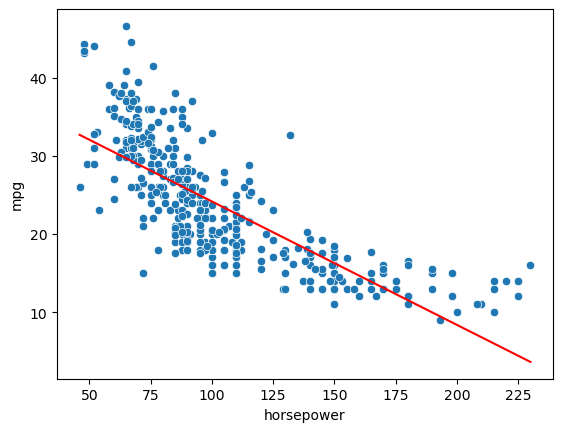

In [3]:
#b)
sns.scatterplot(x="horsepower", y="mpg", data=auto)
sns.lineplot(x=auto["horsepower"], y= model.predict(X), color="red")
plt.show()

/Users/tungvuduc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tungvuduc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


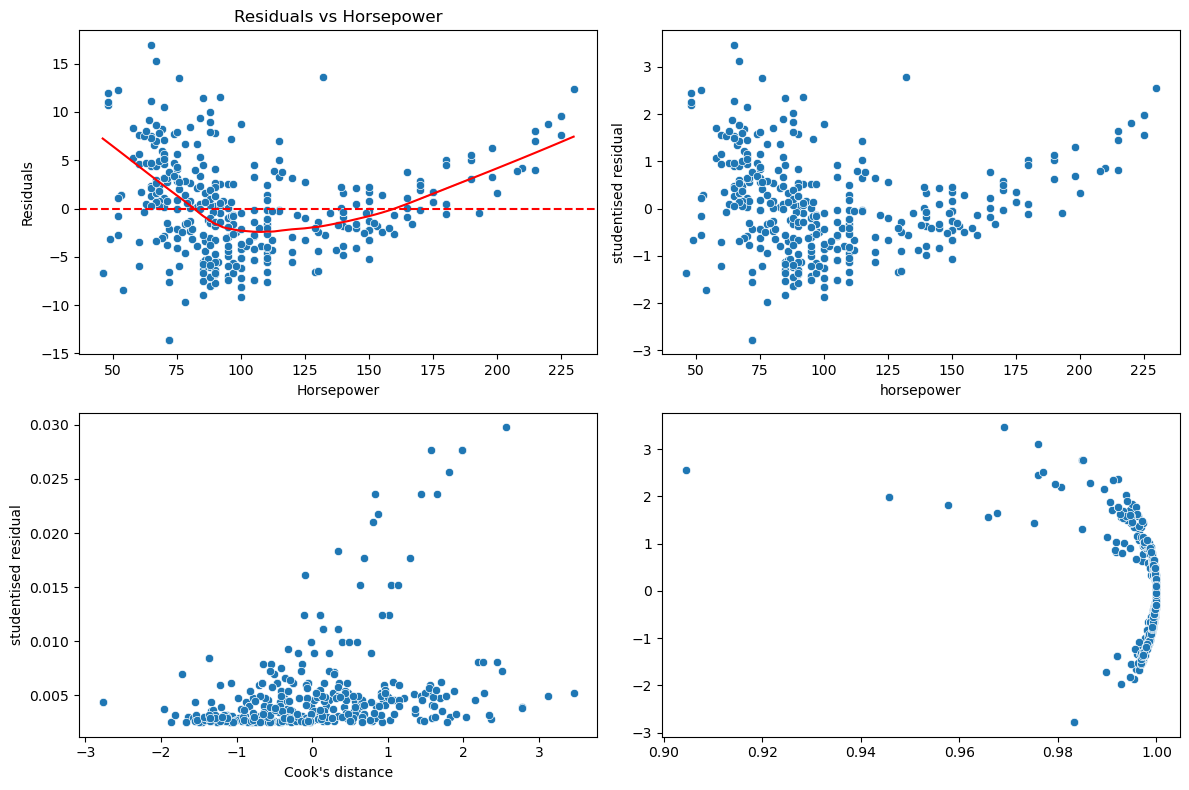

In [4]:
# c)

# get influence
influence = model.get_influence()
standardized_resid = influence.resid_studentized_internal 

resid = model.resid.values
qq  = ProbPlot(resid)
 
fix, ax = plt.subplots(2, 2, figsize=(12, 8))

smooth_fit = lowess(resid, auto["horsepower"])

sns.scatterplot(x=auto["horsepower"], y=resid, ax=ax[0,0])
sns.lineplot(x=smooth_fit[:, 0], y=smooth_fit[:, 1], ax=ax[0,0], color='red')
ax[0,0].axhline(y=0, color='r', linestyle='--')
ax[0,0].set_title("Residuals vs Horsepower")
ax[0,0].set_xlabel("Horsepower")
ax[0,0].set_ylabel("Residuals")

resid_studentized = influence.resid_studentized
sns.scatterplot(x=auto["horsepower"], y=resid_studentized, ax=ax[0, 1])
ax[0,1].set_ylabel("studentised residual")
ax[0,1].set_xlabel("horsepower")

leverage = influence.hat_matrix_diag
sns.scatterplot(x=resid_studentized, y=leverage, ax=ax[1, 0])
ax[1,0].set_xlabel("studentised residual")
ax[1,0].set_ylabel("leverage")

cooks = influence.cooks_distance[1]
sns.scatterplot(x=cooks, y=resid_studentized)
ax[1,0].set_xlabel("Cook's distance")
ax[1,0].set_ylabel("studentised residual")

plt.tight_layout()
plt.show()


# exercise 9

/Users/tungvuduc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tungvuduc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tungvuduc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tungvuduc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

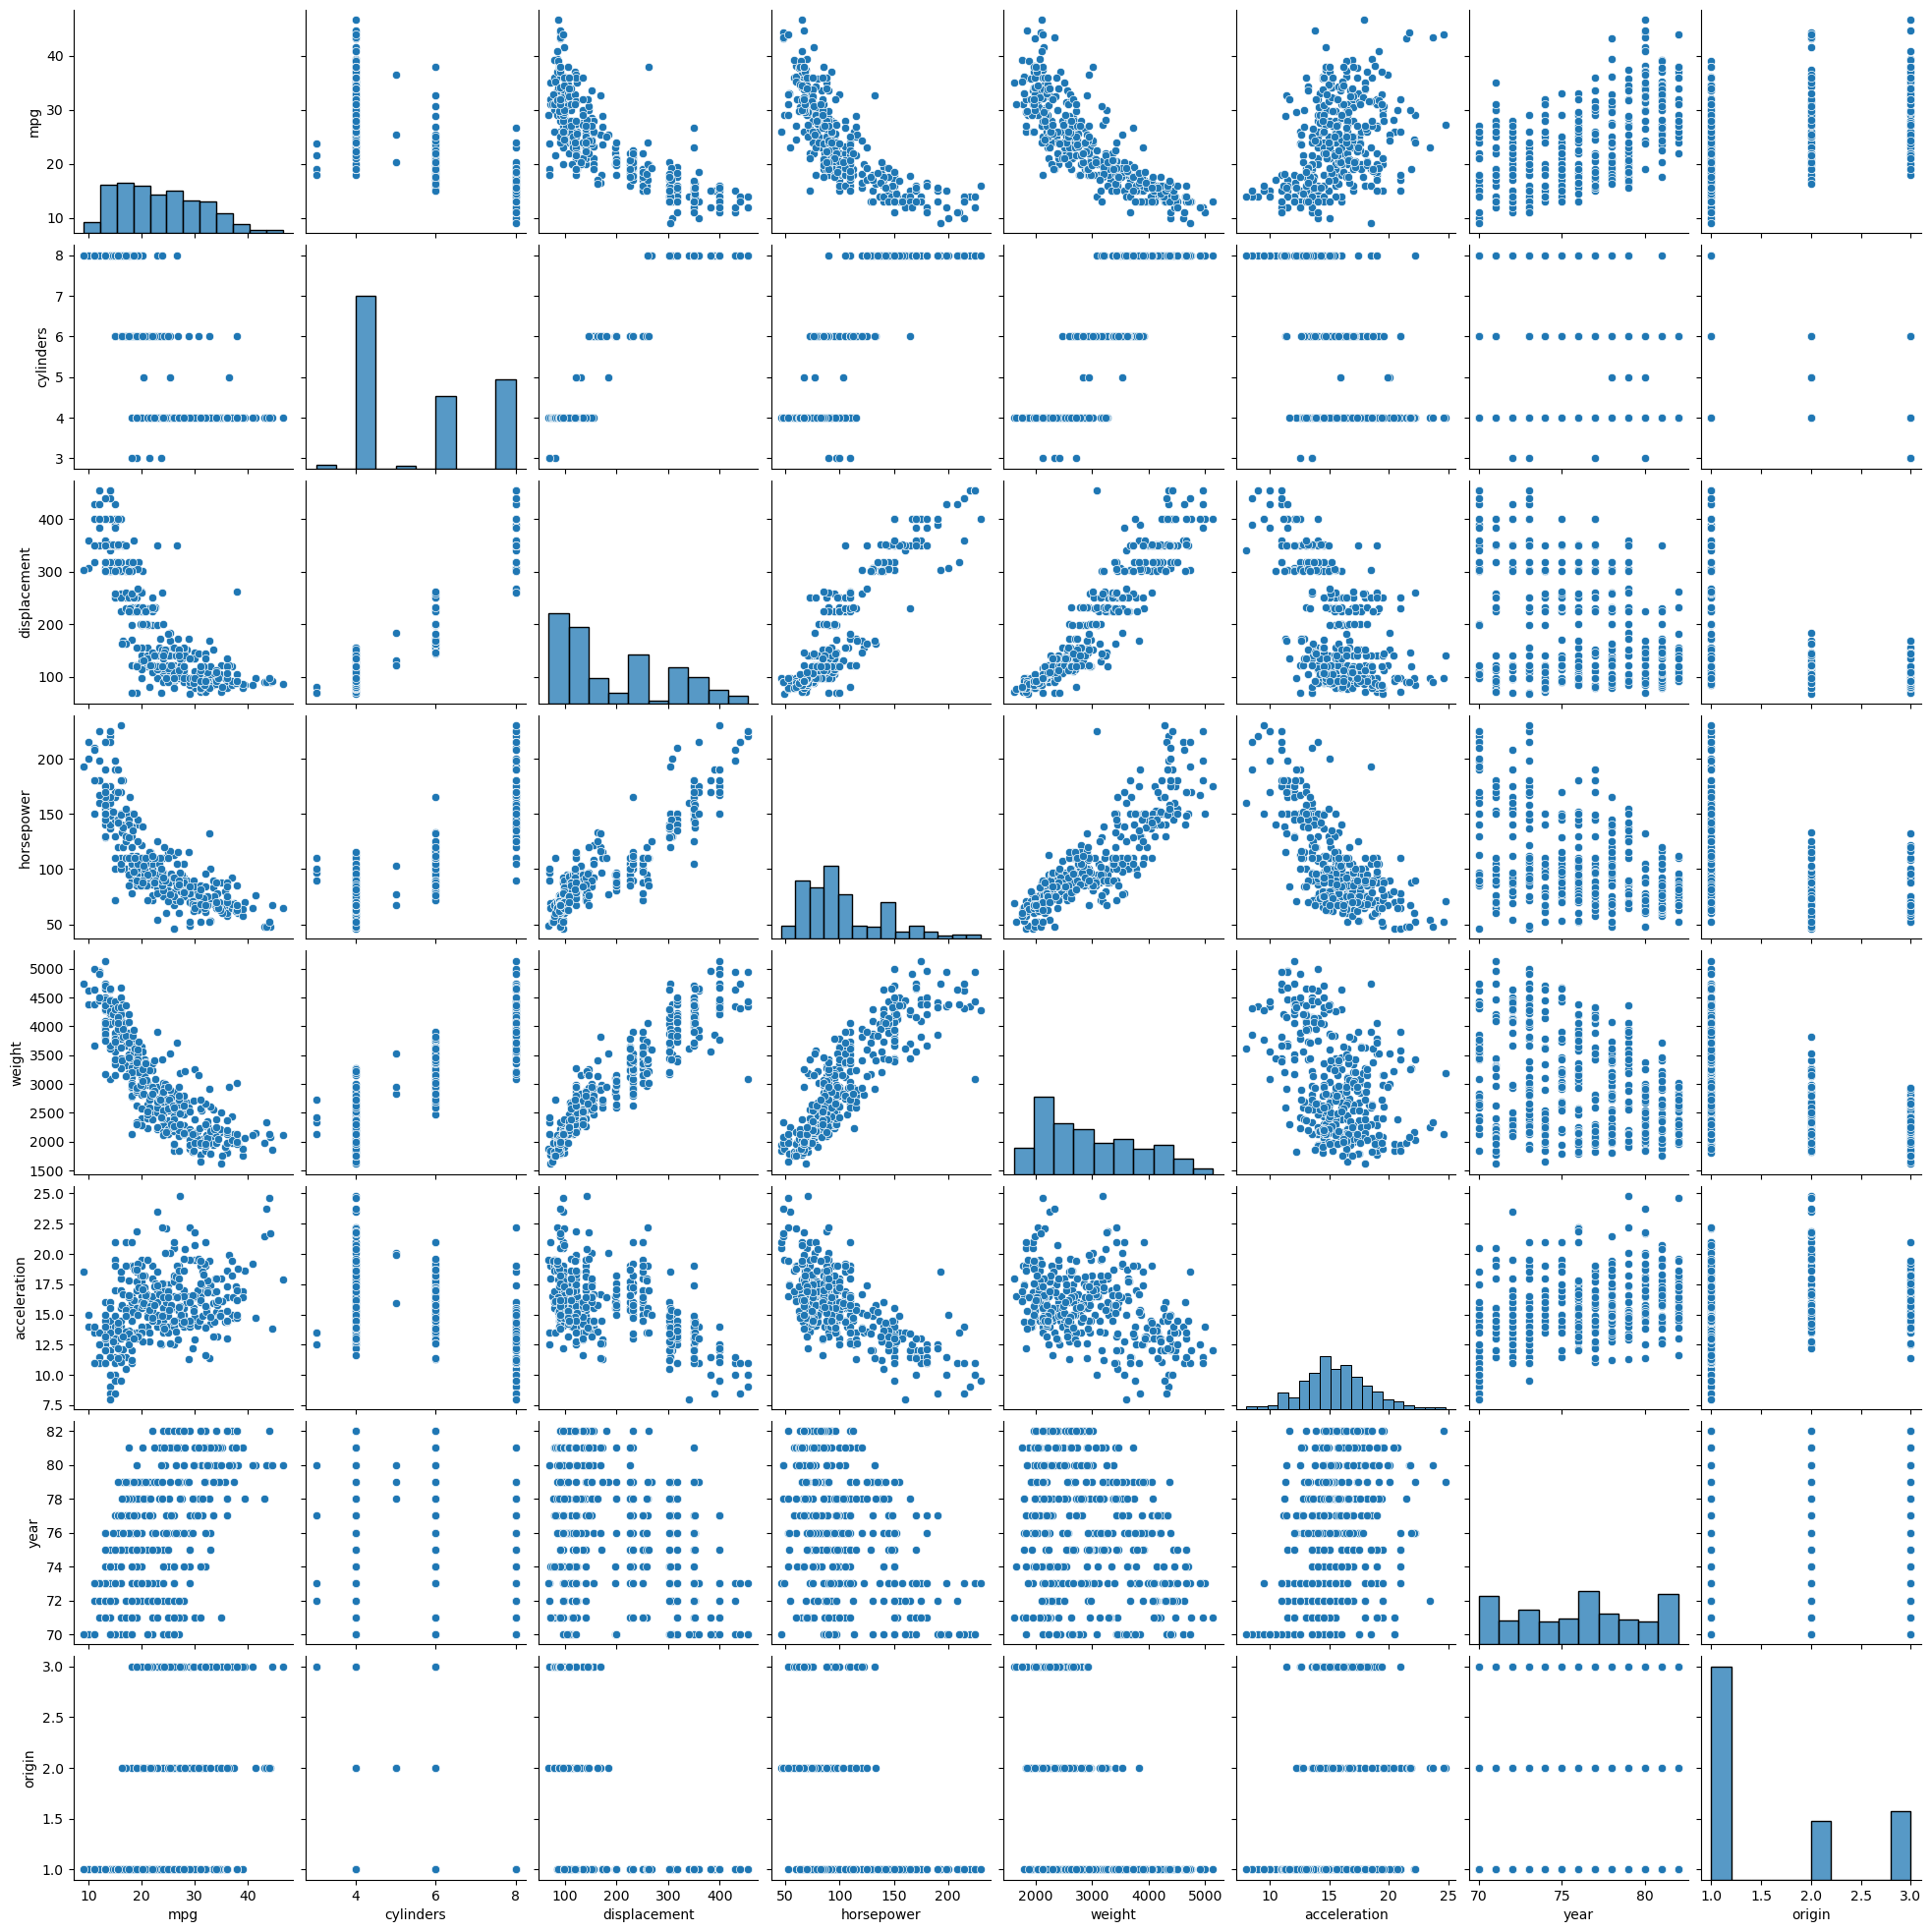

In [5]:
# exercise 9
# a) Produce a scatterplot matrix which includes all of the variables
# in the data set.
# ------------------------------------------------------------
# plot scatterplot for all variables
sns.pairplot(auto)

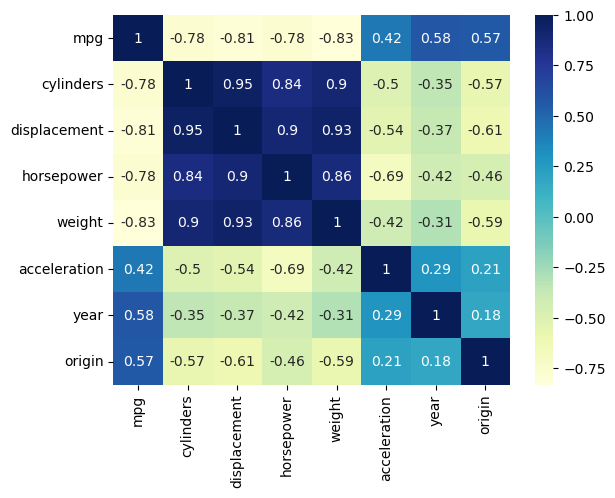

In [6]:
# b) (b) Compute the matrix of correlations between the variables using
# the DataFrame.corr() method.
# ------------------------------------------------------------
corr = auto.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()


In [7]:
# c) Use the sm.OLS() function to perform a multiple linear regression
# with mpg as the response and all other variables except name as
# the predictors. Use the summarize() function to print the results.
# Comment on the output. For instance:
# i. Is there a relationship between the predictors and the re-
# sponse? Use the anova_lm() function from statsmodels to
# answer this question.
# ------------------------------------------------------------

X = auto.drop(columns=["mpg"])
X_const = sm.add_constant(X)
X_std = StandardScaler().fit_transform(X_const)
X_const = pd.DataFrame(X_const, columns=["const"] + list(X.columns))
multiple_model = sm.OLS(y.values, X_const).fit()
print(multiple_model.summary())

# i. Is there a relationship between the predictors and the re-
# sponse? Use the anova_lm() function from statsmodels to
# answer this question.
# ------------------------------------------------------------
# yes there is a relationship between the predictors and the response, due to 
# the low p-value of the F-statistic.

# iii. What does the coefficient for the year variable suggest?
# ------------------------------------------------------------
# it suggests that for each unit year, the mpg increases by 0.7508 per unit year.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 30 May 2025   Prob (F-statistic):          2.04e-139
Time:                        09:33:25   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

/Users/tungvuduc/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


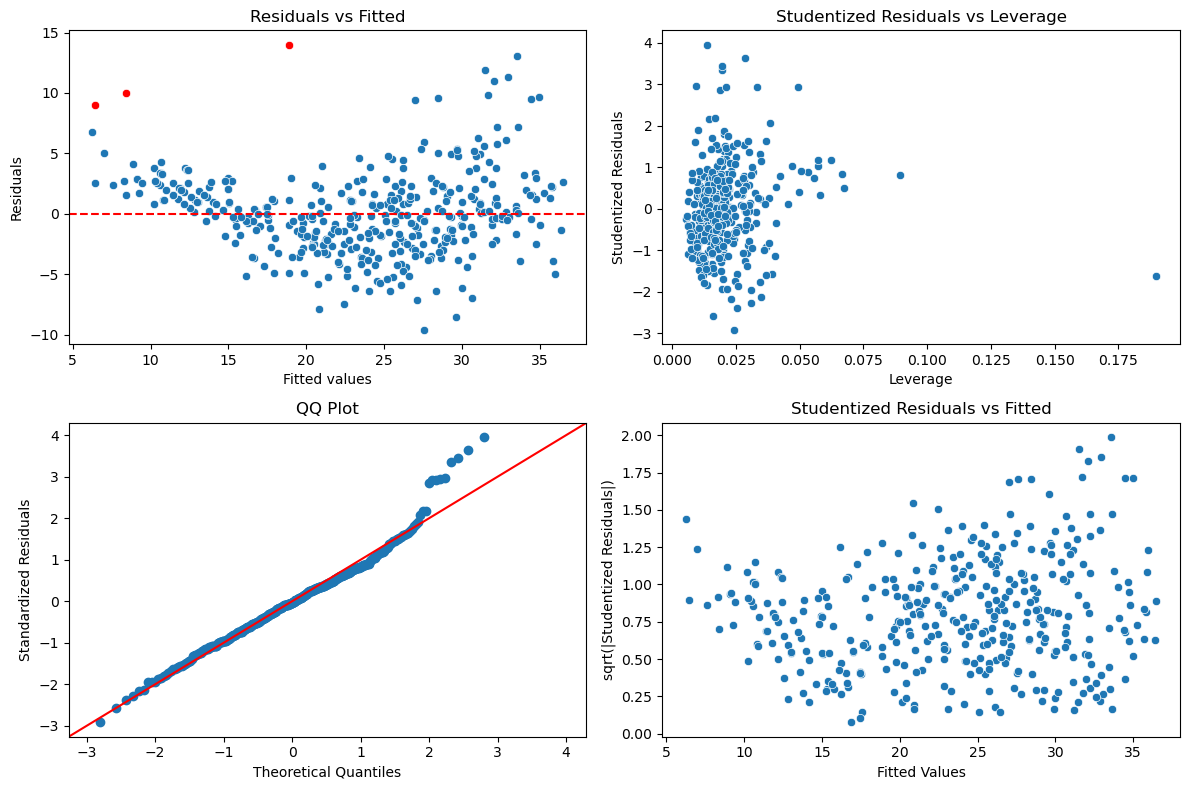

In [8]:
# (d) Produce some of diagnostic plots of the linear regression fit as
# described in the lab. Comment on any problems you see with the
# fit. 
# i. Do the residual plots suggest any unusually large outliers?
# ii. Does the leverage plot identify any observations with unusually
# high leverage?
# ------------------------------------------------------------

# some diagnostic plots
residuals = multiple_model.resid
fitted_values = multiple_model.fittedvalues
leverage = multiple_model.get_influence().hat_matrix_diag
studentized_residuals = multiple_model.get_influence().resid_studentized_internal
cooks_distance = multiple_model.get_influence().cooks_distance[1]
qq = ProbPlot(studentized_residuals)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(x=fitted_values, y=residuals, ax=ax[0, 0])
largest_leverage_index = np.argsort(leverage)[::-1][:3]
sns.scatterplot(x=fitted_values.iloc[largest_leverage_index], y=auto.iloc[largest_leverage_index]["mpg"], ax=ax[0, 0], color="red")
ax[0, 0].axhline(y=0, color='r', linestyle='--')
ax[0, 0].set_title("Residuals vs Fitted")
ax[0, 0].set_xlabel("Fitted values")
ax[0, 0].set_ylabel("Residuals")

sns.scatterplot(x=leverage, y=studentized_residuals, ax=ax[0, 1])
ax[0, 1].set_title("Studentized Residuals vs Leverage")
ax[0, 1].set_xlabel("Leverage")
ax[0, 1].set_ylabel("Studentized Residuals")

qq.qqplot(ax=ax[1, 0], line='45', color='red')
ax[1, 0].set_title("QQ Plot")
ax[1, 0].set_xlabel("Theoretical Quantiles")
ax[1, 0].set_ylabel("Standardized Residuals")

# sns.scatterplot(x=cooks_distance, y=studentized_residuals, ax=ax[1, 1])
# ax[1, 1].set_title("Cook's Distance vs Studentized Residuals")
# ax[1, 1].set_xlabel("Cook's Distance")
# ax[1, 1].set_ylabel("Studentized Residuals")

sns.scatterplot(y=np.sqrt(np.abs(studentized_residuals)), x=fitted_values, ax=ax[1, 1])
ax[1, 1].set_title("Studentized Residuals vs Fitted")
ax[1, 1].set_ylabel("sqrt(|Studentized Residuals|)")
ax[1, 1].set_xlabel("Fitted Values")

plt.tight_layout()
plt.show()

# i) the residual plot doesnt show any unusual large outliers, but the
# leverage plot shows that there are some observations with unusually
# high leverage.
# the QQ plot shows that the residuals are approximately normally distributed,
# apart from the last quantile.



In [9]:
# (e) Fit some models with interactions as described in the lab. Do
# any interactions appear to be statistically significant
# ------------------------------------------------------------
# create all possible interaction terms
predictors = auto.drop(columns=["mpg"]).columns.tolist()
combs = list(combinations(predictors, 2))
for comb in combs:
    auto_with_interactions = auto.copy()
    auto_with_interactions[f"{comb[0]}:{comb[1]}"] = auto_with_interactions[comb[0]] * auto_with_interactions[comb[1]]

    # fit models with interactions
    X_const = sm.add_constant(auto_with_interactions)
    X_std = StandardScaler().fit_transform(X_const)
    X_const = pd.DataFrame(X_const, columns=["const"] + list(auto_with_interactions.columns))
    model_with_itx = sm.OLS(y, X_const).fit()
    if model_with_itx.pvalues[f"{comb[0]}:{comb[1]}"] < 0.05:
        print(f"The interaction between {comb[0]} and {comb[1]} is statistically significant.")
    else:
        print(f"The interaction between {comb[0]} and {comb[1]} is not statistically significant.")

# none of the interactions are statistically significant.
    

The interaction between cylinders and displacement is not statistically significant.
The interaction between cylinders and horsepower is not statistically significant.
The interaction between cylinders and weight is not statistically significant.
The interaction between cylinders and acceleration is not statistically significant.
The interaction between cylinders and year is not statistically significant.
The interaction between cylinders and origin is not statistically significant.
The interaction between displacement and horsepower is not statistically significant.
The interaction between displacement and weight is not statistically significant.
The interaction between displacement and acceleration is not statistically significant.
The interaction between displacement and year is not statistically significant.
The interaction between displacement and origin is not statistically significant.
The interaction between horsepower and weight is not statistically significant.
The interactio

In [10]:
# (f) Try a few different transformations of the variables, such as
# log(X), √X, X2. Comment on your findings.
predictors = auto.drop(columns=["mpg"]).columns.tolist()
for pred in predictors:
    auto_with_transf = auto.copy()
    auto_with_transf[f"log_{pred}"] = np.log(auto_with_transf[pred])
    auto_with_transf[f"sqrt_{pred}"] = np.sqrt(auto_with_transf[pred])
    auto_with_transf[f"{pred}_squared"] = auto_with_transf[pred] ** 2

    # fit models with interactions
    X_const = sm.add_constant(auto_with_transf)
    X_std = StandardScaler().fit_transform(X_const)
    X_const = pd.DataFrame(X_const, columns=["const"] + list(auto_with_transf.columns))
    model_with_itx = sm.OLS(y, X_const).fit()
    if model_with_itx.pvalues[f"log_{pred}"] < 0.05:
        print(f"The  log {pred} is statistically significant.")
    elif model_with_itx.pvalues[f"sqrt_{pred}"] < 0.05:
        print(f"The  sqrt {pred} is statistically significant.")
    elif model_with_itx.pvalues[f"{pred}_squared"] < 0.05:
        print(f"The  {pred} squared is statistically significant.")
    else:
        print(f"The {pred} is not statistically significant.")



The cylinders is not statistically significant.
The displacement is not statistically significant.
The horsepower is not statistically significant.
The weight is not statistically significant.
The acceleration is not statistically significant.
The year is not statistically significant.
The origin is not statistically significant.


# exercise 10

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 30 May 2025   Prob (F-statistic):           2.39e-23
Time:                        10:06:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4963      0.124     60.638      0.0

/Users/tungvuduc/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/tungvuduc/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


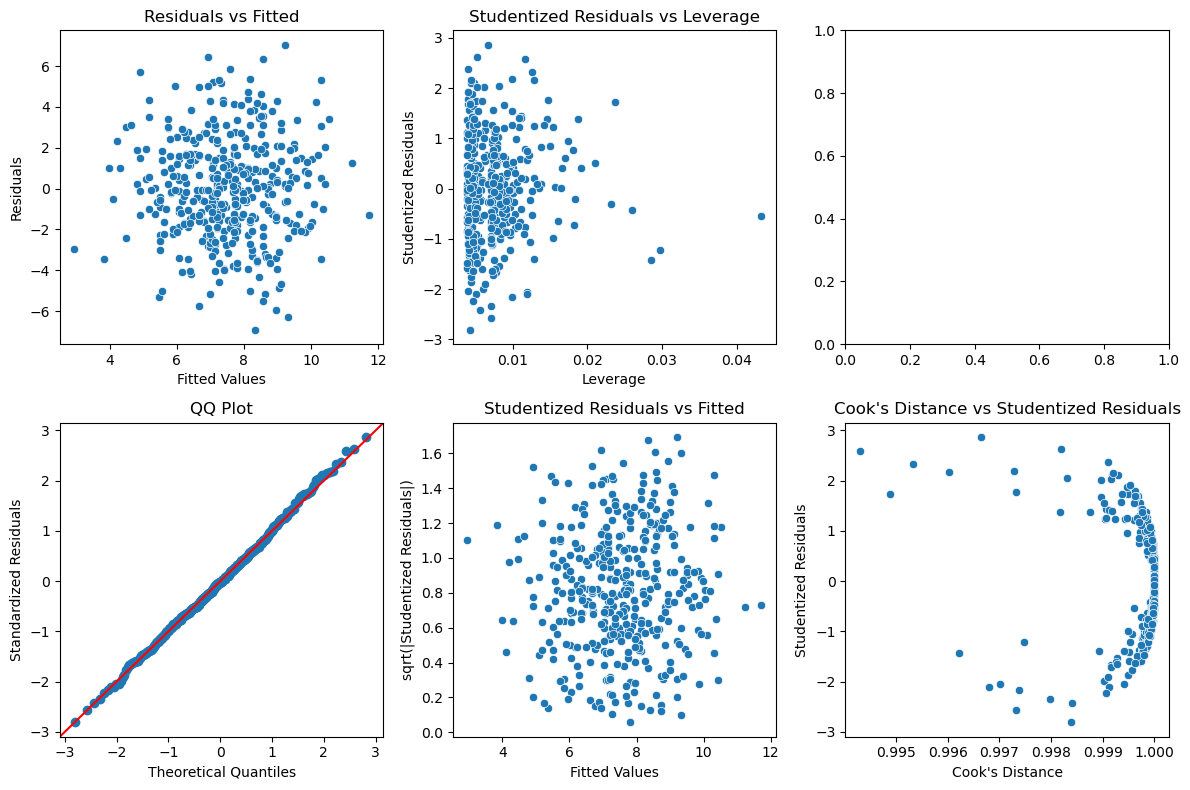

In [52]:
# 10. This question should be answered using the Carseats data set.
# (a) Fit a multiple regression model to predict Sales using Price,
# Urban, and US.
# ------------------------------------------------------------

X = auto[["Price", "Urban", "US"]].copy()
y = auto["Sales"].copy()
X["Urban"] = X["Urban"].map({"Yes": 1, "No": 0})
X["US"] = X["US"].map({"Yes": 1, "No": 0})

X_std = StandardScaler().fit_transform(X)
X_std_const = sm.add_constant(X_std)
X_std_data = pd.DataFrame(X_std_const, columns=["const", "Price", "Urban", "US"])
model = sm.OLS(y, X_std_data).fit()
print(model.summary())

# (b) Provide an interpretation of each coefficient in the model. Be
# careful—some of the variables in the model are qualitative!
# ------------------------------------------------------------
# for each unit inreaase in price, the sale decrases by 1.2878
# for each unit increase in urban, the sale decrases by 0.0100
# for each unit increase in US, the sale increases by 0.5745

# (c) Write out the model in equation form, being careful to handle
# the qualitative variables properly.
# ------------------------------------------------------------
# sales ~  7.4963 + 0.0547 * price - 0.0219 * urban + 0.5745 * US

# (d) For which of the predictors can you reject the null hypothesis
# H0 : βj = 0?
# ------------------------------------------------------------
# for price and US, we can reject the null hypothesis, due to p-value < 0.05

# (e) On the basis of your response to the previous question, fit a
# smaller model that only includes the predictors for which there is
# evidence of association with the outcome.
# ------------------------------------------------------------
X = auto[["Price", "US"]].copy()
y = auto["Sales"].copy()
X["US"] = X["US"].map({"Yes": 1, "No": 0})

X_std = StandardScaler().fit_transform(X)
X_std_const = sm.add_constant(X_std)
X_std_data = pd.DataFrame(X_std_const, columns=["const", "Price", "US"])
model = sm.OLS(y, X_std_data).fit()
print(model.summary())

# (f) How well do the models in (a) and (e) fit the data?
# ------------------------------------------------------------
# the model in (a) has a the same R-squared value as model in (e).

# (g) Using the model from (e), obtain 95% confidence intervals for
# the coefficient(s) of Price and US.
# ------------------------------------------------------------
# Get 95% confidence intervals for coefficients
print("95% confidence intervals for the coefficients of Price and US:")
print(model.conf_int(alpha=0.05))

#(h) Is there evidence of outliers or high leverage observations in the
# model from (e)?
# ------------------------------------------------------------

residuals = model.resid
fitted_values = model.fittedvalues
leverage = model.get_influence().hat_matrix_diag
studentized_residuals = model.get_influence().resid_studentized_internal
cooks_distance = model.get_influence().cooks_distance[1]
qq = ProbPlot(studentized_residuals)
qq.probplot(ax=ax[1, 0], line='45', color='red')
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

sns.scatterplot(x=fitted_values, y=residuals, ax=ax[0, 0])
ax[0, 0].set_title("Residuals vs Fitted")
ax[0, 0].set_xlabel("Fitted Values")
ax[0, 0].set_ylabel("Residuals")
sns.scatterplot(x=leverage, y=studentized_residuals, ax=ax[0, 1])
ax[0, 1].set_title("Studentized Residuals vs Leverage")
ax[0, 1].set_xlabel("Leverage")
ax[0, 1].set_ylabel("Studentized Residuals")
qq.qqplot(ax=ax[1, 0], line='45', color='red')
ax[1, 0].set_title("QQ Plot")
ax[1, 0].set_xlabel("Theoretical Quantiles")
ax[1, 0].set_ylabel("Standardized Residuals")
sns.scatterplot(y=np.sqrt(np.abs(studentized_residuals)), x=fitted_values, ax=ax[1, 1])
ax[1, 1].set_title("Studentized Residuals vs Fitted")
ax[1, 1].set_ylabel("sqrt(|Studentized Residuals|)")
ax[1, 1].set_xlabel("Fitted Values")

sns.scatterplot(x=cooks_distance, y=studentized_residuals, ax=ax[1, 2])
ax[1, 2].set_title("Cook's Distance vs Studentized Residuals")
ax[1, 2].set_xlabel("Cook's Distance")
ax[1, 2].set_ylabel("Studentized Residuals")

plt.tight_layout()
plt.show()










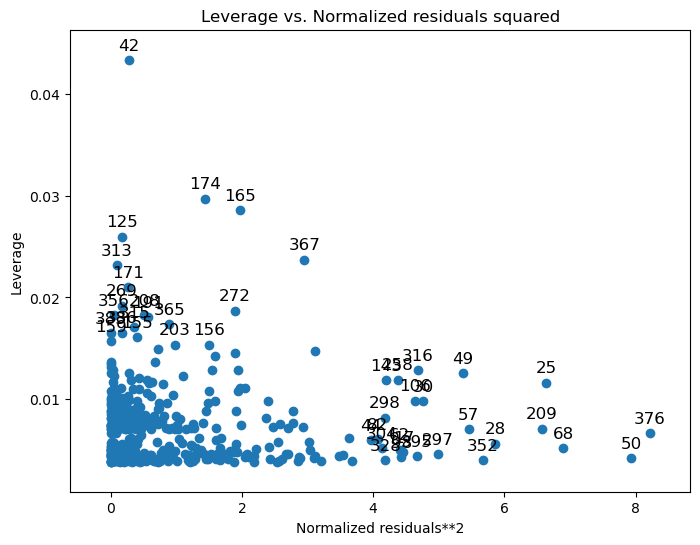

In [49]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# This creates the leverage vs residuals plot with Cook's distance contours
fig, ax = plt.subplots(figsize=(8, 6))
plot_leverage_resid2(model, ax=ax)
plt.show()